In [78]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
starbucks_df=pd.read_csv(r"C:\Users\mohammad alsarese\OneDrive - Tafila Technical University\Copy of SRARBUCKS_BOYCOTT1(1).csv")
starbucks_df.tail(5)

,Date,Market_Va,Rate of change
42,2024-07,86.14,-4.522278874
43,2024-08,107.44,24.7271883
44,2024-09,103.29,-3.862620998
45,2024-10,110.84,7.309516894
46,2024-11,113.06,2.002887044


In [70]:
starbucks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            47 non-null     object 
 1   Market_Va       47 non-null     float64
 2   Rate of change  47 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46],
 [Text(0, 0, '2021-01'),
  Text(1, 0, '2021-02'),
  Text(2, 0, '2021-03'),
  Text(3, 0, '2021-04'),
  Text(4, 0, '2021-05'),
  Text(5, 0, '2021-06'),
  Text(6, 0, '2021-07'),
  Text(7, 0, '2021-08'),
  Text(8, 0, '2021-09'),
  Text(9, 0, '2021-10'),
  Text(10, 0, '2021-11'),
  Text(11, 0, '2021-12'),
  Text(12, 0, '2022-01'),
  Text(13, 0, '2022-02'),
  Text(14, 0, '2022-03'),
  Text(15, 0, '2022-04'),
  Text(16, 0, '2022-05'),
  Text(17, 0, '2022-06'),
  Text(18, 0, '2022-07'),
  Text(19, 0, '2022-08'),
  Text(20, 0, '2022-09'),
  Text(21, 0, '2022-10'),
  Text(22, 0, '2022-11'),
  Text(23, 0, '2022-12'),
  Text(24, 0, '2023-01'),
  Text(25, 0, '2023-02'),
  Text(26, 0, '2023-03'),
  Text(27, 0, '2023-04'),
  Text(28

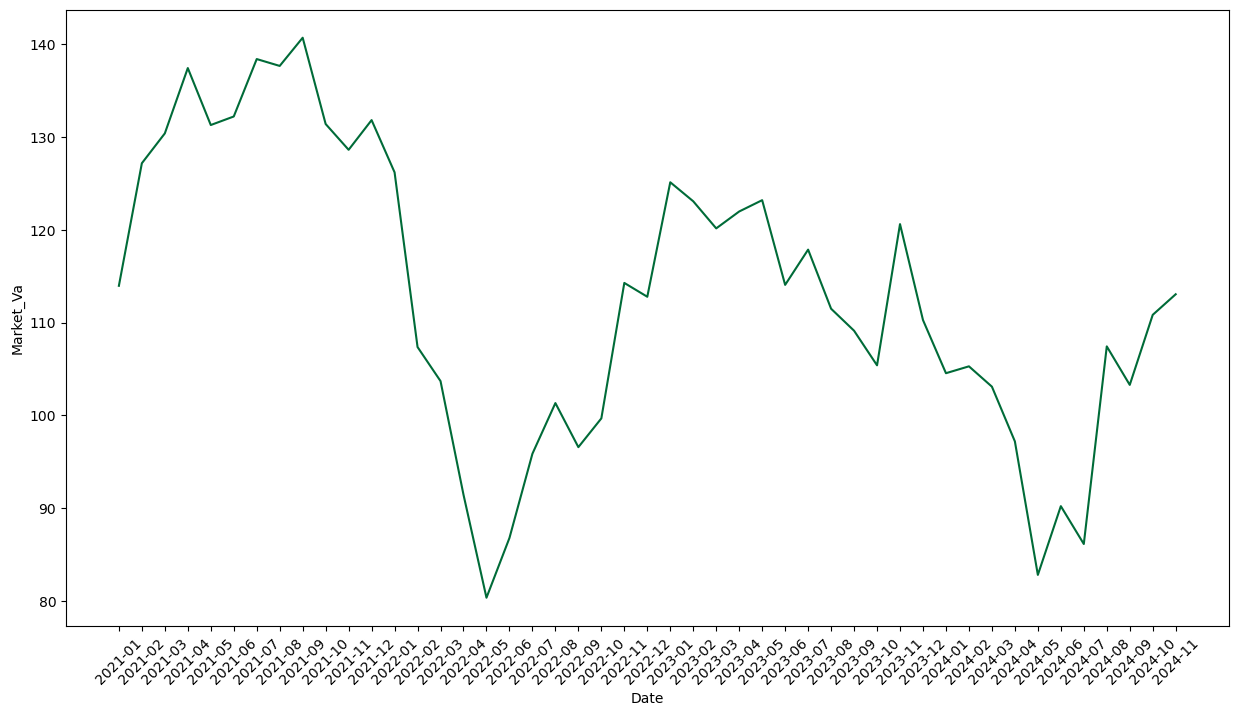

In [79]:
plt.figure(figsize=(15,8))
ax1 = sns.lineplot(y="Market_Va", x="Date", data=starbucks_df,color="#006B38")
plt.xticks(rotation=45)

In [18]:
print(starbucks_df['Date'].unique())

['21-Jan' '21-Feb' '21-Mar' '21-Apr' '21-May' '21-Jun' '21-Jul' '21-Aug'
 '21-Sep' '21-Oct' '21-Nov' '21-Dec' '22-Jan' '22-Feb' '22-Mar' '22-Apr'
 '22-May' '22-Jun' '22-Jul' '22-Aug' '22-Sep' '22-Oct' '22-Nov' '22-Dec'
 '23-Jan' '23-Feb' '23-Mar' '23-Apr' '23-May' '23-Jun' '23-Jul' '23-Aug'
 '23-Sep' '23-Oct' '23-Nov' '23-Dec' '24-Jan' '24-Feb' '24-Mar' '24-Apr'
 '24-May' '24-Jun' '24-Jul' '24-Aug' '24-Sep' '24-Oct' '24-Nov']


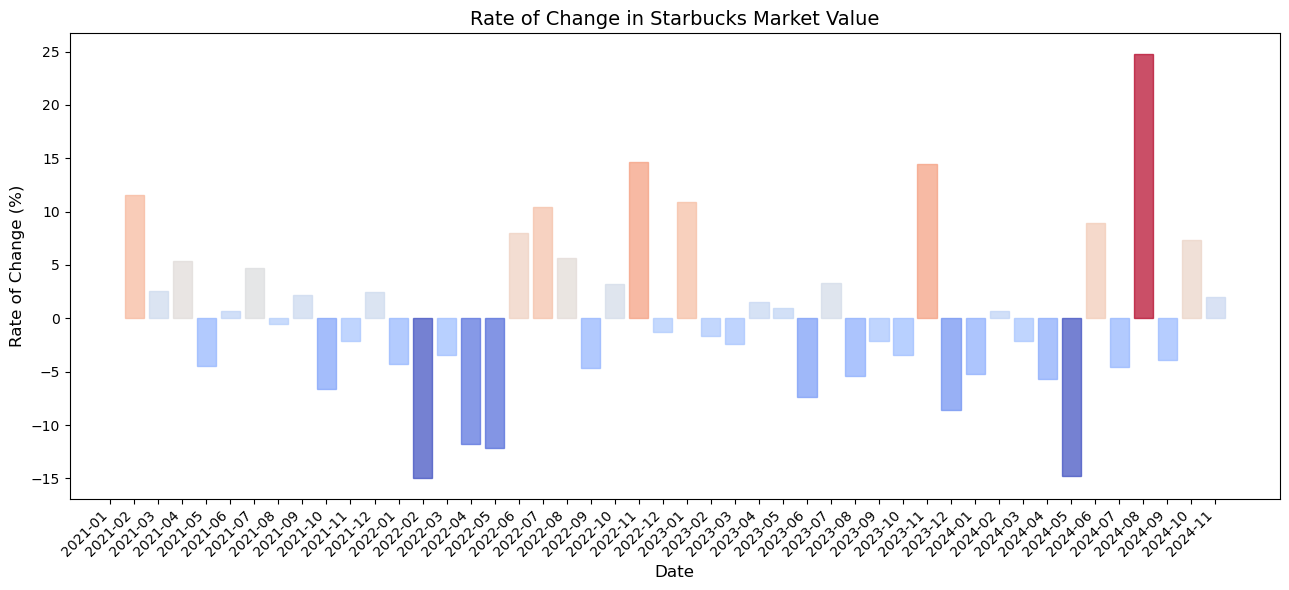

In [80]:
# Convert 'Rate_of_change' to numeric, coercing errors to handle non-numeric values
starbucks_df['Rate of change'] = pd.to_numeric(starbucks_df['Rate of change'], errors='coerce')
# Visualization
fig, ax = plt.subplots(figsize=(13, 6))
bars = ax.bar(
    starbucks_df['Date'],
    starbucks_df['Rate of change'],
    color=[
        'red' if val < 0 else 'blue'
        for val in starbucks_df['Rate of change']
    ],
    alpha=0.7
)

# Add labels and title
ax.set_title('Rate of Change in Starbucks Market Value', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Rate of Change (%)', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Color gradient based on value intensity
colors = starbucks_df['Rate of change'].apply(lambda x: plt.cm.coolwarm((x - starbucks_df['Rate of change'].min()) / (starbucks_df['Rate of change'].max() - starbucks_df['Rate of change'].min())))
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.tight_layout()
plt.show()


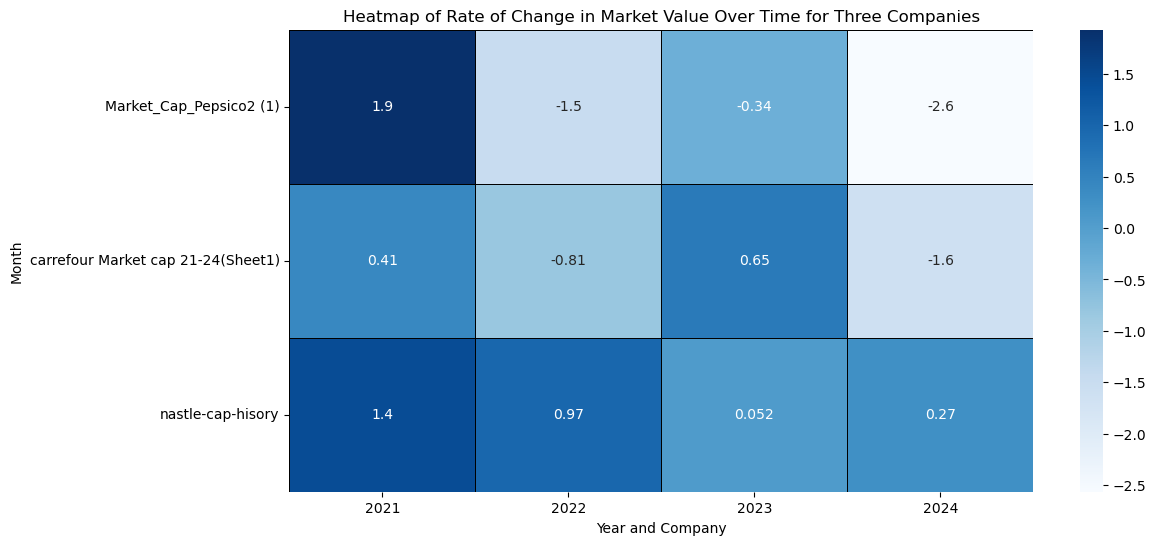

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# قراءة البيانات في DataFrames منفصلة
df1 = pd.read_excel(r"C:\Users\mohammad alsarese\OneDrive - Tafila Technical University\xlsx_nastle.xlsx")
df2 = pd.read_excel(r"C:\Users\mohammad alsarese\OneDrive - Tafila Technical University\xlsx_pepsi.xlsx")
df3 = pd.read_excel(r"C:\Users\mohammad alsarese\OneDrive - Tafila Technical University\xlsx_carrfour.xlsx")

# إضافة عمود الشركة
df1['Company'] = 'Market_Cap_Pepsico2 (1)'
df2['Company'] = 'nastle-cap-hisory'
df3['Company'] = 'carrefour Market cap 21-24(Sheet1)'

# دمج البيانات
df = pd.concat([df1, df2, df3])

# التأكد من تحويل عمود التاريخ إلى نوع تاريخ
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# إزالة الصفوف التي تحتوي على قيم فارغة في عمود التاريخ
df.dropna(subset=['Date'], inplace=True)

# استخراج السنة والشهر من عمود التاريخ
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

pivot_table = df.pivot_table(values='rate of change', index=['Company'], columns=['Year'])

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', linewidths=0.5, linecolor='black')

plt.title('Heatmap of Rate of Change in Market Value Over Time for Three Companies')
plt.xlabel('Year and Company')
plt.ylabel('Month')

plt.show()
